In [3]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
grid = 3
subgrid = 3

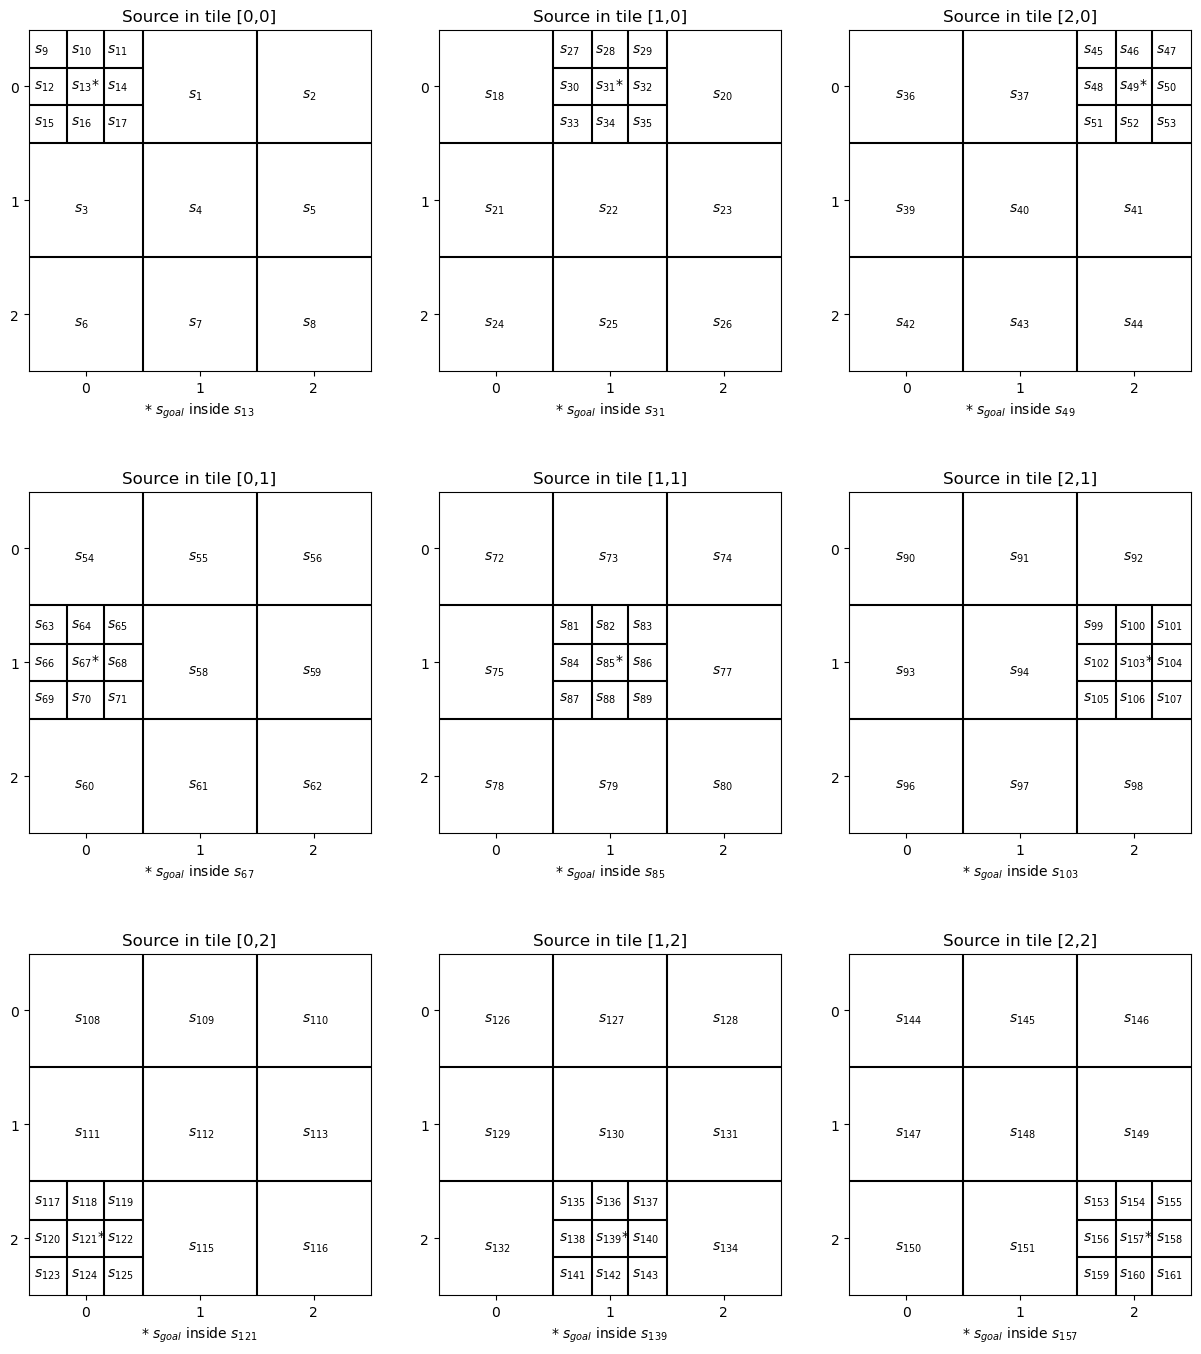

In [81]:
fig, axes = plt.subplots(nrows=grid,
                         ncols=grid,
                         figsize=(15,17),
                         gridspec_kw={'hspace':0.2})

state = 0
source = 0
grid_tiles = grid**2
for c_g in range(grid):
    for r_g in range(grid):
        ax = axes[c_g, r_g]
        ax.set_title(f'Source in tile [{r_g},{c_g}]')

        ax.imshow(np.zeros((grid,grid)), cmap='Greys')

        # Grid and ticks
        ax.set_xticks(np.arange(grid))

        ax.set_yticks(np.arange(grid))

        ax.hlines([0.5,1.5], xmin=-0.5, xmax=2.5, colors='black')
        ax.vlines([0.5,1.5], ymin=-0.5, ymax=2.5, colors='black')

        for a_c_g in range(grid):
            for a_r_g in range(grid):
                if not (a_r_g == r_g and a_c_g == c_g):
                    ax.annotate('$s_{' + str(state) + '}$', xy=np.array([a_r_g, a_c_g]) + np.array([-0.1,0.1]))

                else:
                    tile_corner = np.array([r_g, c_g]) - 0.5
                    disp = 0.16
                    ax.hlines([c_g-disp, c_g+disp], xmin=tile_corner[0], xmax=tile_corner[0]+1, colors='black')
                    ax.vlines([r_g-disp, r_g+disp], ymin=tile_corner[1], ymax=tile_corner[1]+1, colors='black')

                    si = grid_tiles + (source * grid_tiles * 2)
                    for sa_c_g in range(subgrid):
                        for sa_r_g in range(subgrid):
                            ax.annotate('$s_{' + str(si) + '}$' + ('*' if si == grid_tiles + (source * grid_tiles * 2) + 4 else ''), xy=np.array([sa_r_g, sa_c_g]) * disp * 2 + tile_corner + np.array([0.05,0.2]))
                            si += 1

                state += 1
        ax.set_xlabel('* $s_{goal}$ inside $s_{' + f'{state + 4}' + '}$')
        state += grid_tiles
        source += 1